In [33]:
r"""
The code below was produced out of an assignment assigned to me under the Introduction to 
Machine Learning: Supervised Learning course at the University of Colorado Boulder hosted 
by Coursera. The purpose of the assignment was to train and test a simple linear regression 
model to predict house sale prices for Kings County using a dataset that can be downloaded
from https://www.kaggle.com/harlfoxem/housesalesprediction/download. Additional information
for the dataset can be found in https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/.
"""
__author__ = 'Axel V. Morales Sanchez'


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Set color map to have light blue background
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
%matplotlib inline

In [34]:
r"""
In the code block below, I read and modify the dataset. Specifically, I create new 
'sales_year' and 'sales_month' columns that are self explanatory, and drop some 
uneccesary variables 'id', 'date', and 'zipcode'. I then visually analyze the correlation 
of different features with the target 'price' and themselves using sns.heatmap and 
sns.pairplot plots, as well as extracting the feature that has the maximum correlation 
with the target into the variable 'best_guess_predictor'. 
"""
df2 = pd.read_csv('kc_house_data.csv')
df2['sales_year'] = df2.date.apply(lambda x: int(x[:4]))
df2['sales_month'] = df2.date.apply(lambda x: int(x[4:6]))
df2 = df2.drop(['id', 'date', 'zipcode'], axis = 1)
corr = df2.corr()
max_corr = max(corr['price'][1:])
best_guess_predictor = corr['price'][corr['price'] == max_corr].index[0]

<AxesSubplot:>

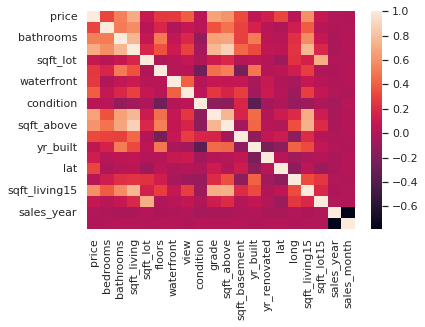

In [35]:
sns.heatmap(corr)

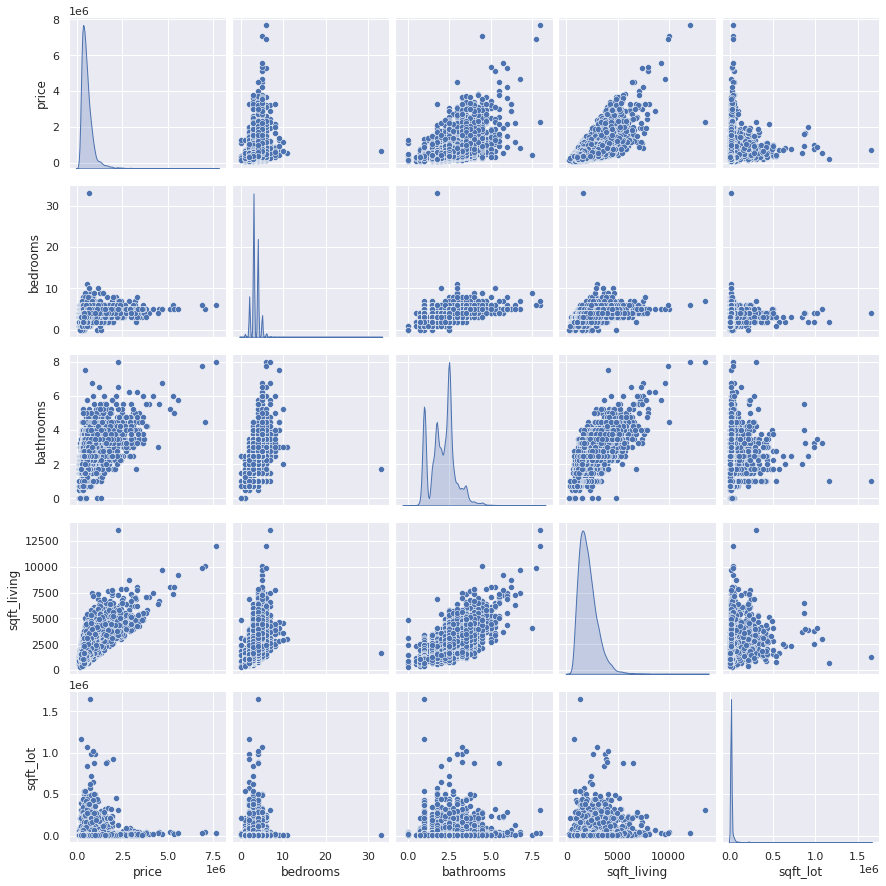

In [36]:
sns.pairplot(data = df2, vars = df2.columns[:5], diag_kind = "kde")

In [37]:
r"""
In the code block below, I split the dataset into a training and testing dataset,
to which I fit an OLS model on the training dataset using 'best_guess_predictor'. 
"""
X_train, X_test = train_test_split(df2, test_size = 0.2)
model = smf.ols(formula = 'price ~ ' + best_guess_predictor, data = X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.675e+04
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:41:07   Log-Likelihood:            -2.4039e+05
No. Observations:               17290   AIC:                         4.808e+05
Df Residuals:                   17288   BIC:                         4.808e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.766e+04   4975.105     -9.580      0.000   -5.74e+04   -3.79e+04
sqft_living   282.9793      2.187    129.412      0.000     278.693     287.265
==============================================================================
Omnibus:                    12321.652   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           509159.643
Skew:                           2.948   Prob(JB):                         0.00
Kurtosis:                      28.923   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient is statistically significant.


In [38]:
r"""
Below I fit a model on the training dataset for each feature and extract the
fitted R-squared of each model. I then insert the top three features based on
the highest R-squared into a list 'top_three'.
"""
rsquared_dict = {}
for column in df2.columns[1:]:
    model = smf.ols(formula = 'price ~ ' + column, data = X_train)
    rsquared_dict[model.fit().rsquared_adj] = column
top_rsquared = sorted(list(rsquared_dict.keys()))[-3:][::-1]
top_three = [rsquared_dict[rsquare] for i, rsquare in enumerate(top_rsquared)]

In [39]:
def prediction_plot(target: str, 
               feature: str, 
               train_data: pd.DataFrame, 
               test_data: pd.DataFrame):
  r"""
  Creates a plot overlaying predicted values from a training OLS linear regression model
  on test data, with a comparison of the training model MSE and predicted values MSE.

  :param target: a string of the target name
  :param feature: a string of the feature name
  :param train_data: a training dataset
  :param test_data: a testing dataset
  :return a matplotlib.plt object displaying test data values overlayed by predicted values
          with a comparison of the training and predicted MSE. 
  """
  formula = target + ' ~ ' + feature
  model = smf.ols(formula = formula, data = train_data)
  result = model.fit()
  mse_train = result.mse_resid
  x_test = test_data[feature]
  y_test = np.array(test_data[target])
  y_pred = np.array(result.predict(x_test))
  mse_test = (1 / len(y_test)) * sum(np.square(y_test - y_pred))
  fig = plt.scatter(x_test, y_test, label = 'Test Data')
  plt.plot(x_test, y_pred, c = 'r', label = 'OLS Prediction')
  plt.plot([], [], ' ', label = 'MSE Test: ' + "{:e}".format(mse_test))
  plt.plot([], [], ' ', label = 'MSE Train: ' + "{:e}".format(mse_train))
  plt.xlabel(feature)
  plt.ylabel(target)
  plt.legend(loc = 'best')
  return(fig)

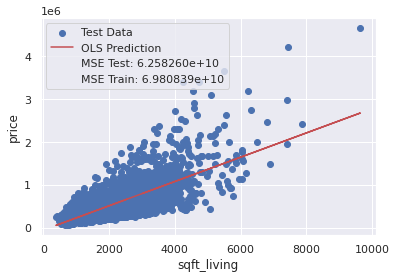

In [40]:
prediction_plot('price', top_three[0], X_train, X_test)

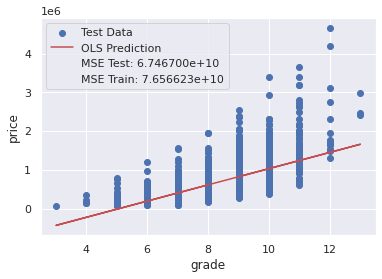

In [41]:
prediction_plot('price', top_three[1], X_train, X_test)

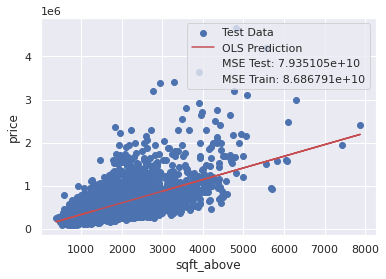

In [42]:
prediction_plot('price', top_three[2], X_train, X_test)

Clearly 'sqft_living' is still the best predictor, both on correlation and adjusted R-squared. 